In [29]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
# 设置中文字体
plt.rcParams['font.sans-serif'] = ['SimHei']
# 设置图片dpi
plt.rcParams['figure.dpi'] = 300

In [30]:
"""
数据预处理
"""
df_food_raw = pd.read_excel('附件2 慢性病及相关因素流调数据.xlsx',sheet_name='饮食习惯')
# 不读取后面7列
df_food = df_food_raw.iloc[:,:-7]
df_food1 = df_food.fillna(-1).values.copy()
j = 0
for i in range(df_food1.shape[0]):
    for j in range(0,df_food1.shape[1],5):
        if df_food1[i,j]>0:
            pass
        elif np.any(df_food1[i,j+1:j+5] >0):
            df_food1[i,j] = 1
        else:
            df_food1[i,j] = 2
j = 0
for i in range(df_food1.shape[0]):
    for j in range(0,df_food1.shape[1],5):
        if np.all(df_food1[i,j+1:j+5]<0):
            df_food1[i,j] =2
j = 0
for i in range(df_food1.shape[0]):
    for j in range(0,df_food1.shape[1],5):
        if df_food1[i,j]==2: # 如果不吃
            df_food1[i,j+1] = 0 # 周为0
            df_food1[i,j+4] = 0 # 量为0
        else:
            if df_food1[i,j+1]>0:
                pass
            elif df_food1[i,j+2]>0:
                # 周为日的7倍
                df_food1[i,j+1] = (df_food1[i,j+2].copy())/7
            elif df_food1[i,j+3]>0:
                # 月频率为日的30倍
                df_food1[i,j+1] = (df_food1[i,j+1].copy())/30
for j in range(0,df_food1.shape[1],5):
    m = np.mean(df_food1[df_food1[:,j+1]>0,j+1])
    df_food1[df_food1[:,j+1]<0,j+1] = round(m,2)

for i in range(df_food1.shape[0]):
    for j in range(0,df_food1.shape[1],5):
        if df_food1[i,j+4]<0:
            df_food1[i,j+4] = round(np.mean(df_food1[df_food1[:,j+1]==df_food1[i,j+1],j+4]),2)
        if df_food1[i,j+4]<0:
            df_food1[i,j+4] = round(np.mean(df_food1[:,j+4]),2)

"""
去掉日,周这两列
"""
df_food2 = df_food1[:,np.array([0,1,4])+0*5].copy()
for j in range(5,df_food1.shape[1],5):
    df_food2 = np.c_["1",df_food2,df_food1[:,np.array([0,1,4])+j].copy()]

df_food2_df = pd.DataFrame(df_food2,columns=[i for i in df_food.columns.values if i[0]!="U"])
df_food2_df

,大米,食用大米的频率,平均每次食用量,小麦面粉,食用小麦面粉的频率,平均每次食用量.1,杂粮,食用杂粮的频率,平均每次食用量.2,薯类,...,平均每次食用量.23,水果,食用水果的频率,平均每次食用量.24,果汁饮料,食用果汁饮料的频率,平均每次食用量.25,其他饮料,食用其他饮料的频率,平均每次食用量.26
0,1.0,1.0,1.0,1.0,0.285714,2.00,1.0,0.330000,2.0,1.0,...,0.0,1.0,2.000000,10.0,2.0,0.000000,0.0,2.0,0.000000,0.0
1,1.0,2.0,1.5,1.0,0.540000,1.50,1.0,0.330000,1.0,1.0,...,1.5,1.0,2.000000,3.0,1.0,0.428571,2.0,1.0,1.000000,2.0
2,1.0,2.0,2.0,2.0,0.000000,0.00,2.0,0.000000,0.0,2.0,...,2.0,1.0,0.285714,2.0,2.0,0.000000,0.0,1.0,0.142857,1.0
3,1.0,3.0,1.5,1.0,0.285714,4.00,1.0,0.142857,2.0,1.0,...,2.0,1.0,1.000000,2.0,2.0,0.000000,0.0,1.0,0.428571,0.5
4,1.0,1.0,1.5,1.0,0.285714,2.00,2.0,0.000000,0.0,2.0,...,0.0,1.0,0.285714,1.0,1.0,1.000000,2.0,2.0,0.000000,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7831,1.0,2.0,1.5,1.0,0.142857,1.50,1.0,0.330000,1.0,1.0,...,2.0,1.0,1.000000,2.0,1.0,0.428571,1.0,1.0,0.285714,1.0
7832,1.0,3.0,2.0,1.0,0.142857,2.00,2.0,0.000000,0.0,1.0,...,3.0,1.0,2.000000,4.0,2.0,0.000000,0.0,2.0,0.000000,0.0
7833,1.0,2.0,3.0,2.0,0.000000,0.00,1.0,0.285714,2.0,1.0,...,0.0,1.0,2.000000,3.0,1.0,0.285714,2.0,2.0,0.000000,0.0
7834,1.0,2.0,1.0,1.0,0.540000,0.75,1.0,0.330000,2.0,1.0,...,2.0,1.0,2.000000,5.0,2.0,0.000000,0.0,2.0,0.000000,0.0


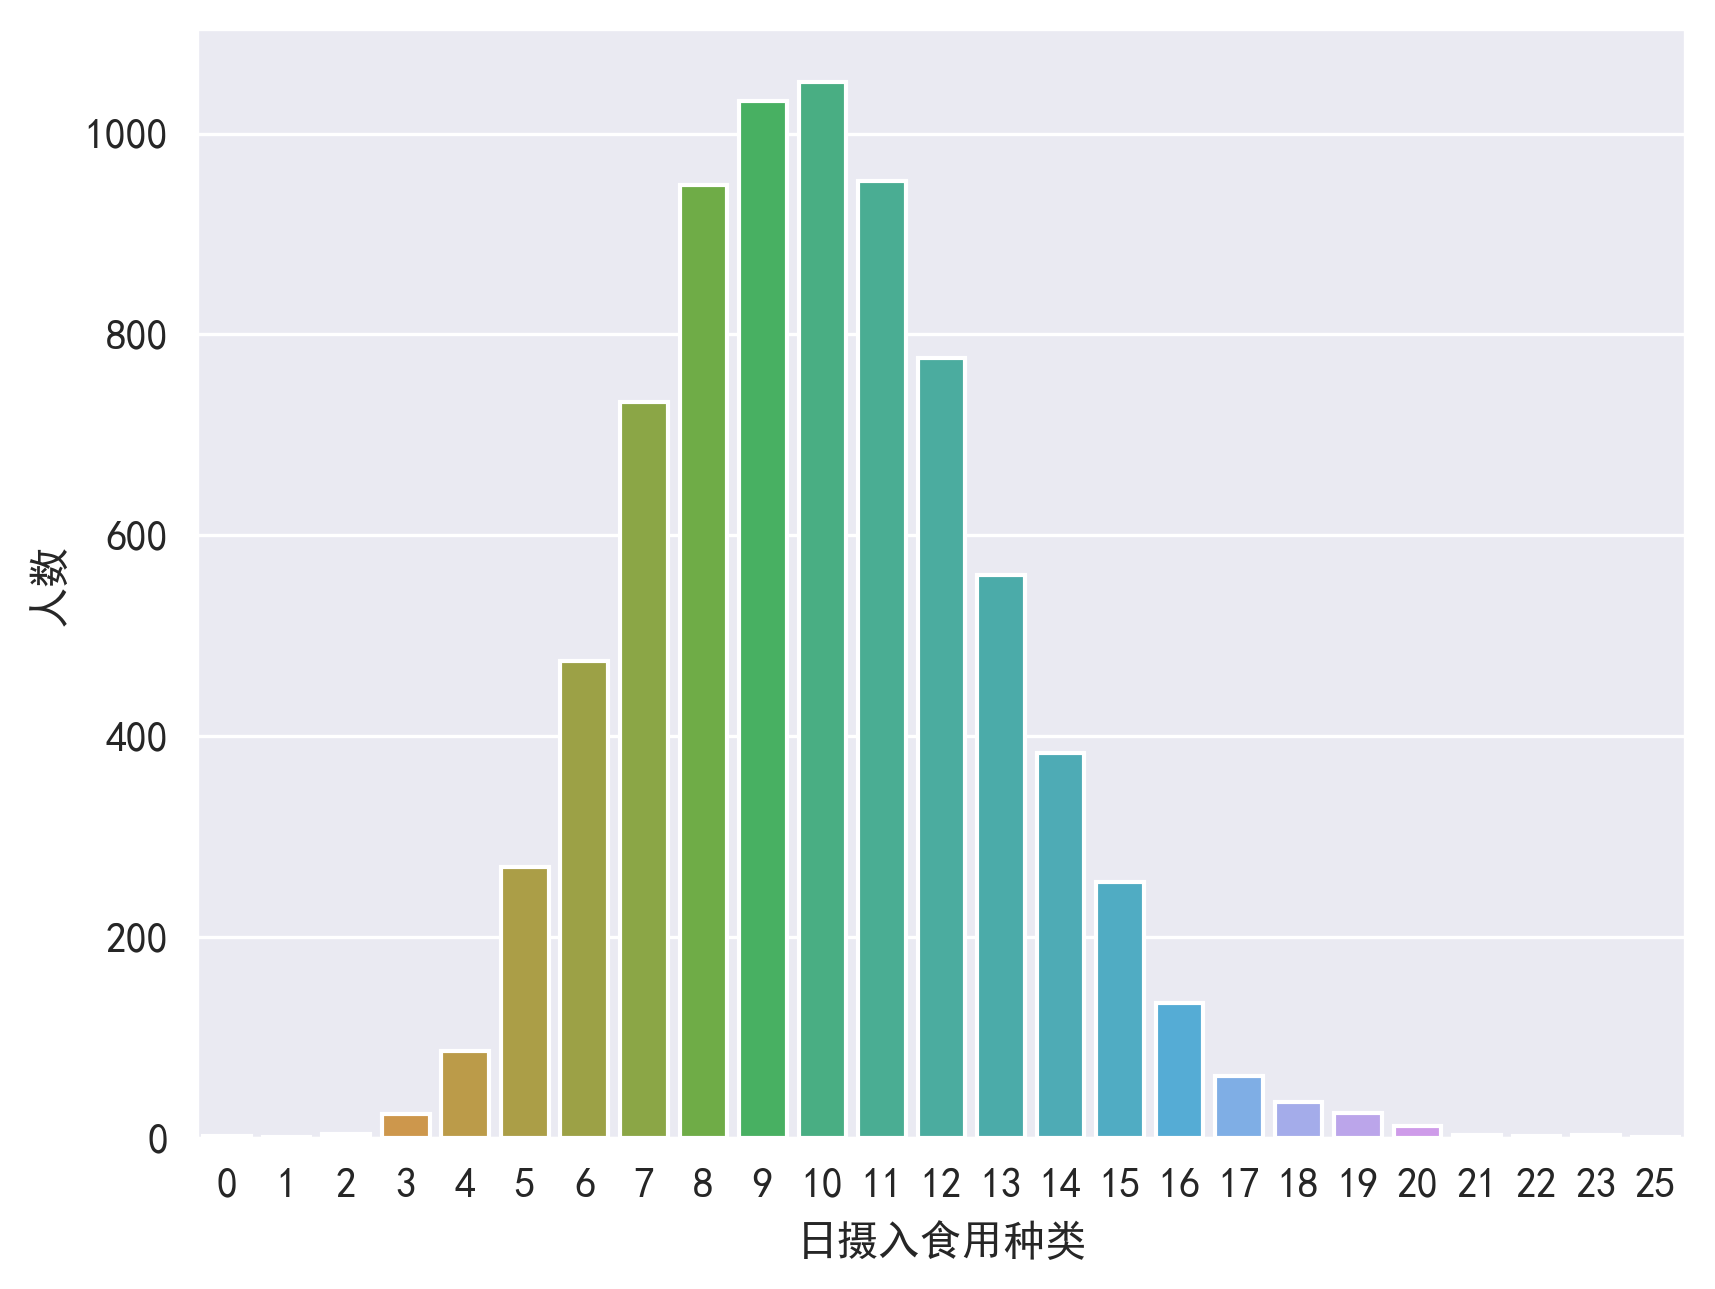

In [31]:
"""
统计每一行中食用某种食物的频率不为0的个数,比如第一行中,选取第二列,第五列,第八列,以此类推
"""
# 先选取第二列,第五列,第八列,以此类推
df_food3 = df_food2_df.iloc[:,np.arange(1,df_food2_df.shape[1],3)].copy()
# 统计每一行中不为0的个数
df_food3["日摄入食用种类"] = df_food3[df_food3>0.3].count(axis=1)
df_food3
# 将食用种类用sns柱状图画出来
sns.countplot(x="日摄入食用种类",data=df_food3)
plt.ylabel("人数")
plt.show()

蔬菜:0.25148
蛋 瘦肉:0.20256
水果:0.19325
奶制品:0.15156
种类: 0.10123
油 : 0.07562
盐 : 0.02520
